In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the file 2017_jun_final.csv using the "read_csv" method
df = pd.read_csv('./2017_jun_final.csv')

In [4]:
# Display the resulting table using the "head" method
pd.set_option('display.max_columns', 8) # hide the extra columns
df.head(8)

,N,Посада,Мова програмування,Спеціалізація,...,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,...,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,...,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,...,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,...,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,...,0.5,4500,NaN,DEV
5,6,Project manager,NaN,NaN,...,1.0,400,NaN,PM
6,7,Junior Software Engineer,C#/.NET,NaN,...,0.0,600,NaN,DEV
7,8,Senior Software Engineer,C++,NaN,...,1.0,3300,NaN,DEV


In [5]:
# Determining the size of the table
df.shape

(8704, 25)

In [6]:
# Defining the types of all columns
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

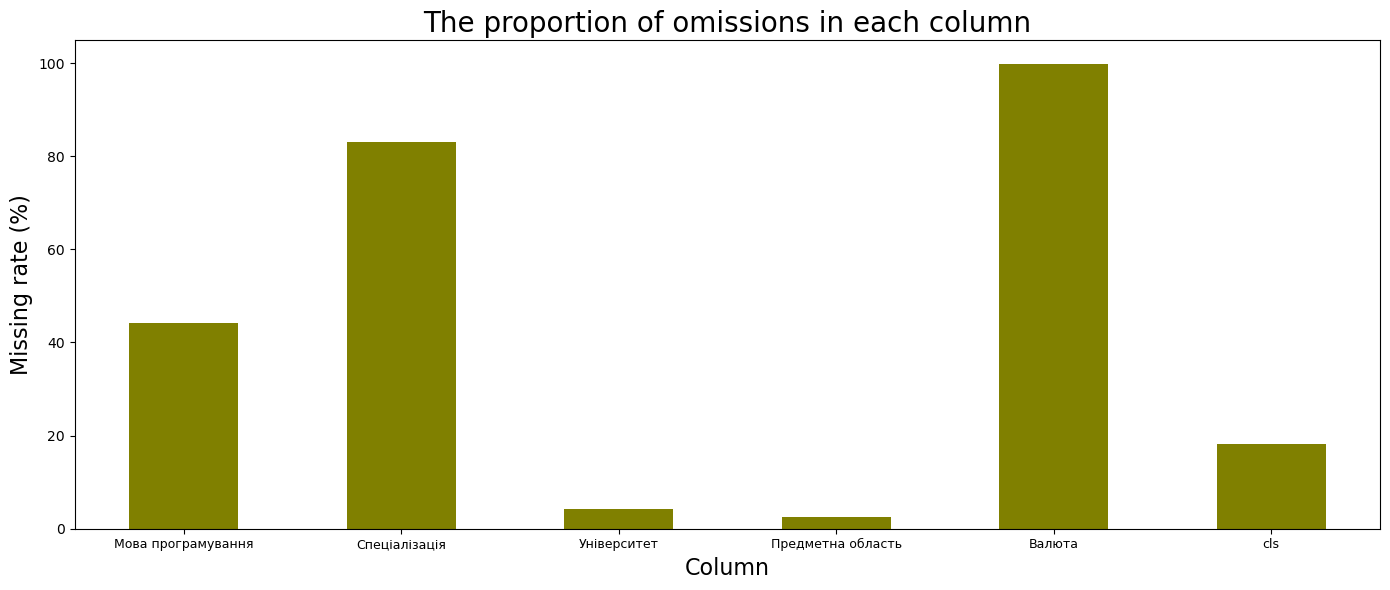

In [7]:
# The proportion of omissions in each column
missing_data_percent = df.isnull().sum() / len(df) * 100
print(missing_data_percent)

columns_with_missing_data = missing_data_percent[missing_data_percent > 0]
plt.figure(figsize=(14, 6))
columns_with_missing_data.plot(kind='bar', color='olive')
plt.title('The proportion of omissions in each column', fontsize=20)
plt.xlabel('Column', fontsize=16)
plt.ylabel('Missing rate (%)', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=9)
plt.tight_layout()
plt.show()

In [8]:
# Remove all blank columns except the "Мова програмування" column
language_column = df["Мова програмування"]
df_cleaned = df.dropna(axis=1)
df_cleaned = pd.concat([df_cleaned, language_column], axis=1)

In [9]:
# Checking the percentage of misses after deletion
df_cleaned.isnull().sum() / len(df_cleaned) * 100

N                                    0.000000
Посада                               0.000000
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
Мова програмування                  44.232537
dtype: float64

In [10]:
# Delete all blank rows
df_cleaned = df_cleaned.dropna()

In [11]:
# New table size
df_cleaned.shape

(4854, 20)

In [12]:
# A table of specialists who use Python
pd.set_option('display.max_columns', 5) # hide the extra columns
python_data = df_cleaned[df_cleaned["Мова програмування"].str.contains("Python", na=False)]
print(python_data)

         N                    Посада  ... salary Мова програмування
12      13         Software Engineer  ...    800             Python
68      69         Software Engineer  ...    900             Python
87      88  Junior Software Engineer  ...    600             Python
114    115  Junior Software Engineer  ...    685             Python
143    144  Junior Software Engineer  ...    750             Python
...    ...                       ...  ...    ...                ...
8546  8547         Software Engineer  ...   2000             Python
8625  8626         Software Engineer  ...   1750             Python
8635  8636  Senior Software Engineer  ...   4000             Python
8673  8674  Junior Software Engineer  ...    350             Python
8695  8696         Software Engineer  ...   1500             Python

[207 rows x 20 columns]


In [13]:
# The size of the "python_data" table
python_data.shape

(207, 20)

In [14]:
# Grouping by "Посада" column
grouped_data = python_data.groupby('Посада')

In [15]:
# Data aggregation for minimum and maximum salary values
agg_salary_data = grouped_data.agg({'Зарплата на місяць': ['min', 'max']})
print(agg_salary_data)

                         Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200


In [16]:
# Adding a new column with average salary
def fill_avg_salary(row):
    return (row[('Зарплата на місяць', 'min')] + row[('Зарплата на місяць', 'max')]) / 2

agg_salary_data['avg'] = agg_salary_data.apply(fill_avg_salary, axis=1)
print(agg_salary_data)

                         Зарплата на місяць           avg
                                        min   max        
Посада                                                   
Junior Software Engineer                100  1250   675.0
Senior Software Engineer               1300  9200  5250.0
Software Engineer                       500  5400  2950.0
System Architect                       3000  5000  4000.0
Technical Lead                         1425  6200  3812.5


In [17]:
# Descriptive statistics for column "avg"
agg_salary_data['avg'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

In [18]:
# Saving the table in CSV
df.to_csv('processed_data.csv', index=False)